In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors


def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)


In [4]:
wavelength_to_rgb(400, gamma=0.8)

(0.4372461308176645, 0.0, 0.6047821747376145, 1.0)

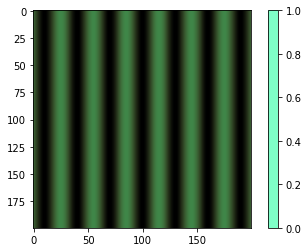

In [5]:
def make_color_map ( wavelength ):
    """ Return a LinearSegmentedColormap going from transparent to full intensity
    for a wavelength given in nanometer .
    wavelength : float (in nm)
    """
    R, G, B, A = wavelength_to_rgb ( wavelength )
    colors = [(R,G,B,c) for c in np. linspace (0 ,1 ,100)]
    return matplotlib.colors.LinearSegmentedColormap . from_list ("mycmap ", colors )#change mycimap

y, x = np. mgrid [:200 ,:200]
z_red = np. sin (2* np.pi *(x -100)/60)**2
wv = 640# nm
red_colormap = make_color_map (wv)
plt. imshow (z_red , cmap = red_colormap, alpha=0.5 )

wv2 = 500# nm
violet_colormap = make_color_map (wv2)
plt. imshow (z_red , cmap = violet_colormap, alpha=0.5 )

plt. colorbar ()
plt. gca (). set_facecolor ("0") # add a black background
plt. show ()

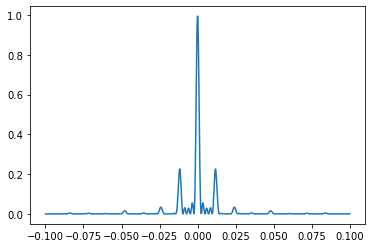

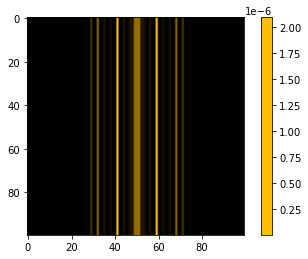

In [131]:
def I2(I0,d,a,X,lamb,f):
    c=(lamb*f)**(-1)
    y=[]
    In=[]
    for e in X:
        for x in e:
            
            if x!=0:
                y.append(I0*(np.sin(2*np.pi*N*x*c*d/2)/(N*np.sin(2*np.pi*x*c*d/2)))**2*(np.sinc(2*np.pi*x*c*a/2))**2)
            else:
                y.append(y[len(y)-1])
        In.append(y)
        y=[]
        
    return In

def I(I0,d,a,X,lamb,f):
    c=(lamb*f)**(-1)
    y=[]
    for x in X:
        if x!=0:
            y.append(I0*(np.sin(2*np.pi*N*x*c*d/2)/(N*np.sin(2*np.pi*x*c*d/2)))**2*(np.sinc(2*np.pi*x*c*a/2))**2)
        else:
            y.append(I0)
    return y

#Paramètres
I0=1 
d=50*10**(-6) #Distance entre les fentes
a=10*10**(-6) #Taille des fentes
lamb=600*10**(-9) #longueur d'onde
f=1 #focale
N=5 #Nombres de fentes
                   
# Affichage du graphique de l'intensité ne fonction de la position sur l'écran                
X=np.linspace(-10*10**(-2),10*10**(-2),1000)
Y=np.linspace(-10*10**(-2),10*10**(-2),1000)
I_graph=I(I0,d,a,X,lamb,f)
plt.figure()
plt.plot(X,I_graph)
plt.show()

y,x = np. mgrid[-50:50 ,-50:50]
I_mesh=I2(I0,d,a,x,lamb,f)



#Affichage de la figure d'interférence
wv = lamb*10**9# nm
colormap = make_color_map (wv)
plt. imshow (I_mesh, cmap = colormap, alpha=1 )


plt. colorbar ()
plt. gca (). set_facecolor ("0") # add a black background
plt. show ()

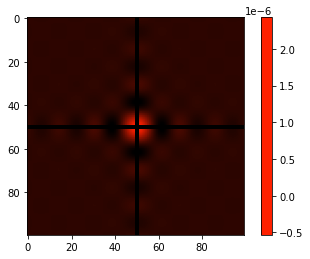

In [124]:
I0=1 
d=50*10**(-6) #Distance entre les fentes
a=10*10**(-6)
lamb=640*10**(-9)
f=1
N=5

y, x = np. mgrid[-50:50 ,-50:50]
mesh = I0*((np.sin(np.pi*d*x/(lamb*f))*np.sin(np.pi*d*y/(lamb*f)))/((np.pi*d*y/(lamb*f))*np.pi*d*x/(lamb*f)))
wv = 640# nm
colormap = make_color_map (wv)
plt. imshow (mesh, cmap = colormap, alpha=1 )
plt. colorbar ()
plt. gca (). set_facecolor ("0") # add a black background
plt. show ()

In [ ]:
#esssais de fonctions
#z_red = (I0/2)*(1+np.cos((2*d*np.pi*x)/(lamb*f))*np.cos((2*d*np.pi*y)/(lamb*f)))
#z_red = I0*((np.sin(np.pi*d*x/(lamb*f))*np.sin(np.pi*d*y/(lamb*f)))/((np.pi*d*y/(lamb*f))*np.pi*d*x/(lamb*f)))
#z_red = I0*(np.sinc((np.pi*d*x)/(lamb*f))*np.sinc((np.pi*d*y)/(lamb*f)))
#z = (I0/2)*(1+np.cos((2*d*np.pi*y)/(lamb*f)))
#z_red=I0*(np.sin(2*np.pi*N*x*c*d/2)/(N*np.sin(2*np.pi*x*c*d/2)))**2*(np.sinc(2*np.pi*x*c*a/2))**2